In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import numpy
import sys
from scipy import stats

restaurants = pd.read_csv('final_restaurants.csv')

In [158]:
contingency = list()
for code in restaurants['postal code'].unique():
    chains = restaurants[restaurants['postal code']==code]['is chain'].sum()
    indie = restaurants[restaurants['postal code']==code]['is chain'].count() - chains
    if chains != 0 and indie != 0:
        contingency.append([indie, chains])
chi2res = stats.chi2_contingency(contingency)
chi2res[1]
# extremely small p-value, reject that values are independent across categories.

4.839253212814388e-39

Trying to do ANOVA... but I dont think the data is fit for that...

In [118]:
restaurants = restaurants[['name','amenity','tags','postal code','is chain']]
grouped = restaurants.groupby('postal code', as_index=False).agg({'is chain': ['sum', 'count']})
grouped.columns = grouped.columns.map('_'.join)
grouped = grouped.reset_index(drop=True)
grouped['mean'] = grouped['is chain_sum'] / grouped['is chain_count']
grouped = grouped[['postal code_','mean']]
grouped

,postal code_,mean
0,J4Y,0.000000
1,L6A,0.000000
2,V0M,0.000000
3,V0N,0.000000
4,V1M,0.396825
...,...,...
99,V7T,0.560000
100,V7V,0.235294
101,V7W,0.350000
102,V7X,0.666667


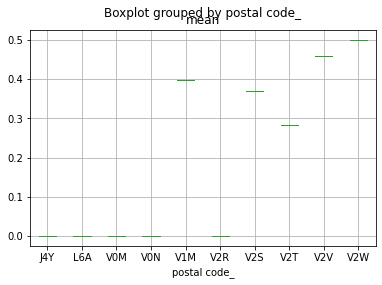

In [69]:
grouped[0:10].boxplot(column='mean', by='postal code_')

In [32]:
formula = "restaurants['is chain'] ~ restaurants['postal code']"
lm = ols(restaurants['is chain'] ~ restaurants['postal code'], restaurants).fit()
print(lm.summary())

SyntaxError: invalid syntax (<ipython-input-32-b4591272a102>, line 2)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
'''
X = restaurants.drop('Code', axis=1).to_numpy()
y = restaurants['Code']

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

model = RandomForestClassifier(n_estimators=500, max_depth=18, min_samples_leaf=10)
model.fit(X_train, y_train)
'''

"\nX = restaurants.drop('Code', axis=1).to_numpy()\ny = restaurants['Code']\n\nX_train, X_valid, y_train, y_valid = train_test_split(X, y)\n\nmodel = RandomForestClassifier(n_estimators=500, max_depth=18, min_samples_leaf=10)\nmodel.fit(X_train, y_train)\n"

In [49]:
ratings = pd.read_csv('hot_encoded_rests.csv')
'''
ratings = ratings[['name','lat','lon','price_level','rating','user_ratings_total','bar', 'bistro',
       'cafe', 'fast_food', 'ice_cream', 'juice_bar', 'pub', 'restaurant','chain_False','chain_True']]
ratings.loc[ratings['price_level'].isnull(), ['price_level']] = 0 # Make NaN price levels zero.
ratings
'''
ratings

,Unnamed: 0,name,lat,lon,price_level,rating,user_ratings_total,amenity,amenity_label,bar,...,cafe,fast_food,ice_cream,juice_bar,pub,restaurant,is_chain,chain_label,chain_False,chain_True
0,0,starbucks,49.260812,-123.125736,2.0,3.9,127,cafe,2,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,1,0.0,1.0
1,1,waves,49.263582,-123.128836,0.0,3.8,290,cafe,2,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,1,0.0,1.0
2,2,mcdonald's,49.263448,-123.138067,1.0,3.4,539,fast_food,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,True,1,0.0,1.0
3,3,denny's,49.263225,-123.133390,2.0,4.0,532,restaurant,7,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,True,1,0.0,1.0
4,4,the keg,49.271156,-123.135808,3.0,4.2,1366,restaurant,7,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,True,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,5096,browns socialhouse,49.033067,-123.069255,2.0,4.0,348,restaurant,7,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,False,0,1.0,0.0
5097,5097,wood n frog coffee company,49.024524,-123.066485,1.0,4.6,224,cafe,2,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
5098,5098,ridge garden,49.250815,-123.168022,2.0,4.1,79,fast_food,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
5099,5099,kanaka creek coffee,49.187647,-122.552271,2.0,4.7,261,cafe,2,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0


In [44]:
X = ratings.drop(['name','rating'], axis=1)#.to_numpy()
y = ratings['rating']

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

#model = RandomForestClassifier(n_estimators=500, max_depth=18, min_samples_leaf=5)
#model.fit(X_train, y_train)
[['name','lat','lon','price_level','rating','user_ratings_total','bar', 'bistro',
       'cafe', 'fast_food', 'ice_cream', 'juice_bar', 'pub', 'restaurant','chain_False','chain_True']]
X = np.stack([X_train['lat'], X_train['lon'], X_train['price_level'], X_train['user_ratings_total'],
              X_train['bar'], X_train['bistro'], X_train['cafe'],
              X_train['fast_food'], X_train['ice_cream'], X_train['juice_bar'],
              X_train['pub'], X_train['restaurant'], X_train['chain_False'],
              X_train['chain_True']], axis=1)
model = LinearRegression(fit_intercept=True)
model.fit(X, y_train)
#coefficients = model.coef_

LinearRegression()

In [45]:
X_columns = ['lat','lon','price_level','user_ratings_total','bar','bistro','cafe',
             'fast_food','ice_cream','juice_bar','pub','restaurant','chain_False','chain_True']
coefficients = model.coef_
regress = ' + '.join('%.3g*%s' % (coef, col) for col, coef in zip(X_columns, coefficients))
print('next_temp = ' + regress)

next_temp = 0.704*lat + 0.182*lon + 0.278*price_level + 0.000174*user_ratings_total + -0.132*bar + 0.39*bistro + -0.0319*cafe + -0.193*fast_food + 0.157*ice_cream + 1.25e-16*juice_bar + -0.107*pub + -0.0831*restaurant + 0.0821*chain_False + -0.0821*chain_True


In [47]:
print("Training score: %g\nValidation score: %g" % (model.score(X_train, y_train), model.score(X_valid, y_valid)))

Training score: 0.108484
Validation score: 0.103135


In [ ]:
X = ratings.drop(['name','rating'], axis=1)#.to_numpy()
y = ratings['rating']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
model = GaussianNB()
model.fit(X_train, y_train)
print("Training score: %g\nValidation score: %g" % (model.score(X_train, y_train), model.score(X_valid, y_valid)))